In [1]:
using PyPlot
using Calculus

## Ejercicio 1

In [5]:
function DerivadaNumerica(f::Function,x,h)
    df = (f(x+h) -f(x))/h
    return df
end

DerivadaNumerica (generic function with 1 method)

In [17]:
f(x)=cos(x)
DerivadaNumerica(f,0.5,0.01)

-0.483805424462147

## Ejercicio 2

In [11]:
DerivadaNumerica(f,0.5,0.0001),"    ",f'(0.5)

(-0.4794694169341085, "    ", -0.47942553859714465)

In [25]:
function grafica(f::Function,x0,h,N)
 y = []
 x = []
    for i in 1:N
        h = h/5
        r = DerivadaNumerica(f,x0,h)
        j = 1/h
        push!(x,r)
        push!(y,j)
    end
    plot(y,x)
end

grafica (generic function with 1 method)

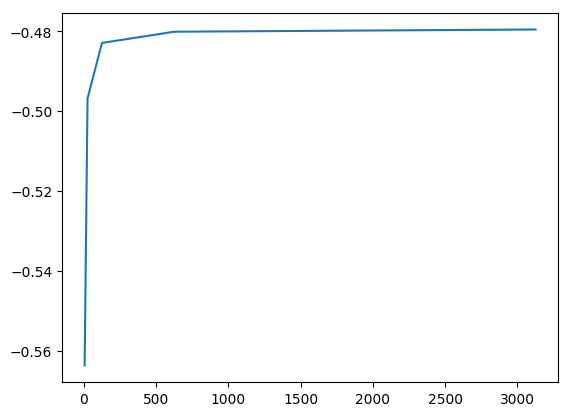

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb9d0248490>

In [30]:
grafica(f,0.5,1,5)

Se puede observar en la gráfica que entre menor sea h el valor de la aproximación se parecera mas al valor real ya que: $\left. \frac{d}{d\xi}cos(x)\right|_{\xi=x} = -sin(x)$ y $-sin(0.5) = -0.4792$

In [8]:
Df(x) = -sin(x)

Df (generic function with 1 method)

In [18]:
function Error(f::Function,x0,h,N)
x = []
y = []
    for i in 1:N
    h = h/5
    e = (DerivadaNumerica(f,x0,h) - f'(x0))/f'(x0)
    j = h
    push!(x,e)
    push!(y,j)
    end
    plot(y,x)
end

Error (generic function with 1 method)

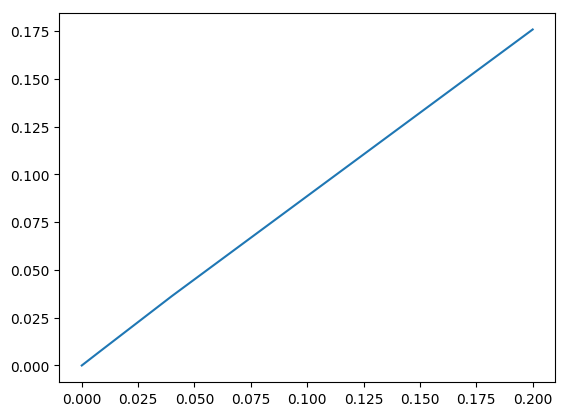

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb9d0859910>

In [20]:
Error(f,0.5,1,10)

## Ejerecicio 3

Con Taylor para $f(x+h)$  y  $f(x-h)$ tenemos que:


$$f(x+h)=f(x)+hf'(x)+\dfrac{h^{2}}{2}f''(x)+\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$ 


$$f(x-h)=f(x)-hf'(x)+\dfrac{h^{2}}{2}f''(x)-\dfrac{h^{3}}{6}f'''(x)+\mathcal{O}(h^{4})$$ 

Si restamos la expreciones 


$$f(x+h)-f(x-h)=2hf'(x)+\dfrac{h^{3}}{3}f'''(x)+\mathcal{O}(h^{5})=
2hf'(x)+\mathcal{O}(h^{3})$$

Vemos que los terminos pares se eliminan, entonces, dividiendo entre $\space$  $2h$ $\space$

$$\frac{f(x+h)-f(x-h)}{2h}-f'(x)=\mathcal{O}(h^{2})$$ 

por lo tanto $$f'(x)\approx \frac{f(x+h) -f(x-h)}{2h}$$

## Ejercico 4

In [7]:
function derivada_simetrica(f,x,h)
    ds = (f(x+h)-f(x-h))/2h # - f'(x)
    return ds
end

derivada_simetrica (generic function with 1 method)

In [18]:
derivada_simetrica(f,0.5,0.001),"    ", f'(0.5)

(-0.4794254586999447, "    ", -0.47942553859714465)

In [11]:
function grafica2(f::Function,x0,h,N)
 y = []
 x = []
    for i in 1:N
        h = h/10
        r = derivada_simetrica(f,x0,h)
        j = 1/h
        push!(x,r)
        push!(y,j)
    end
    plot(y,x)
end

grafica2 (generic function with 1 method)

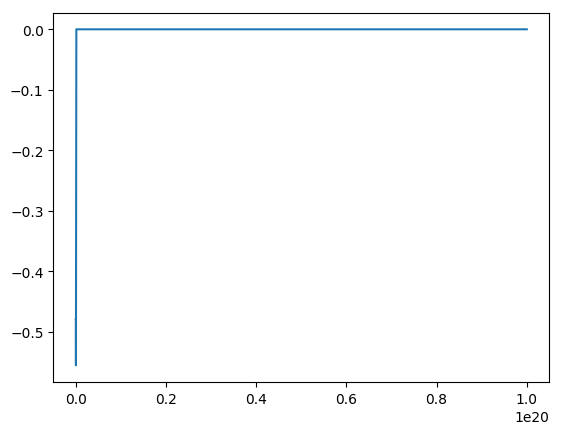

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8296faaf90>

In [12]:
grafica2(f,0.5,1,20)

In [13]:

function Error2(f::Function,x0,h,N)
x = []
y = []
    for i in 1:N
    h = h/5
    e = (derivada_simetrica(f,x0,h) - f'(x0))/f'(x0)
    j = h
    push!(x,e)
    push!(y,j)
    end
    plot(y,x)
end

Error2 (generic function with 1 method)

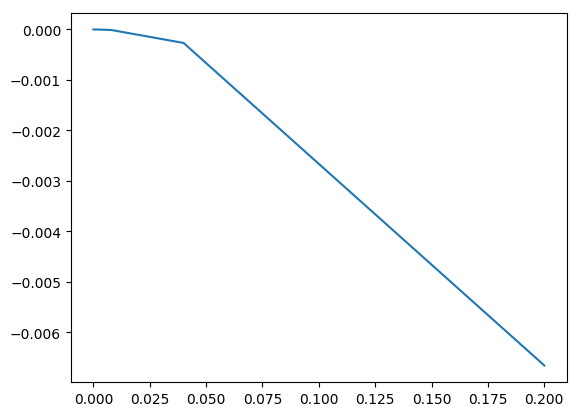

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8296cd3550>

In [16]:
Error2(f,0.5,1,10)

## Ejercicio 5

Para que $\Delta_h$ esa un operador lineal debemos de ver que abra suma y saque escalares.

 

$$\Delta_{h}(\alpha f +\beta g) = \sum\nolimits_{n=0}^\infty{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n(\alpha f +\beta g)}{dx^n}$$

Como la derivada es un perador lineal:

$$ = \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\left[\alpha \frac{d^n f}{dx^2} +\beta \frac{d^n g}{dx^2}\right]$$

distribuimos 

$$= \sum\nolimits_{n = 1}^{\infty} \left[\alpha\frac{h^n}{n!}\frac{d^n f}{dx^2} + \beta\frac{h^n}{n!} \frac{d^n g}{dx^2}\right]$$

Separando la suma tenemos que:

$$ = \alpha \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^2} + \beta \sum\nolimits_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^2}$$

$$= \alpha \Delta_{h}(f) +\beta \Delta_{h}(g)$$



## Ejercicio 6

Desarrollando la exponencial como suma:

$$e^x = \sum_{n = 0}^{\infty} \frac{x^n}{n!}$$

y entonces tenemos que 
$$\Delta_{h} = e^{h\frac{d}{dx}} -1$$



con lo que llegamos a 
$$\frac{1}{h}log(\Delta_{h} +1) = \frac{d}{dx}$$

y $$log(1+x)= 0+\left. \frac{1}{1+x}\right|_{x=0}x-\frac{x^2}{2}$$

por ultimo 
$$\frac{d}{dx} =\frac{1}{h}\left(\Delta_{h} -\frac{1}{2} \Delta_{h}^2+.....\right)$$ 


## Ejercicio 7

Sabemos que $\Delta_h= exp \left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)-1$ y que $\Delta_{-h}= exp \left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)-1.$



Entonces: $\delta_h=\Delta_h-\Delta_{-h} = exp \left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)-1 -exp \left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)+1 = 2sinh\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right)$, despejando $\left. \frac{d}{d\xi}\right|_{\xi=x}$ tenemos:

$\left. \frac{d}{d\xi}\right|_{\xi=x} = (1/h)sinh^{-1}\left(\delta_h/2\right)$